**Model Selection Criterias**
* Validation performance.
* Simplicity/interpretability.
* Stability/robustness.

In [95]:
import numpy as np
import pandas as pd
import statistics as stat

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from operator import itemgetter

%matplotlib inline

In [75]:
def plot_train_test(results, axis):

    test = results['test_score']
    train = results['train_score']
    test_std = np.sqrt(results['test_score_variance'])
    train_std = np.sqrt(results['train_score_variance'])

    # Repeated experiments.
    x_coords = np.arange(np.size(test))

    axis.plot(
        x_coords, 
        train, 
        color='blue', marker='o', markersize=5, 
        label=f"Training score"
    )
    axis.plot(
        x_coords, 
        test, 
        color='green', linestyle='--', marker='s', 
        label=f"Validation score"
    )
    axis.fill_between(
        x_coords, 
        train - train_std, 
        train + train_std, 
        alpha=0.15, color='blue'
    )
    axis.fill_between(
        x_coords, 
        test - test_std, 
        test + test_std, 
        alpha=0.15, color='green'
    )
    return axis

# Data 

In [76]:
orig_results = pd.read_csv(
    './../../data_source/results/original_images/all_features_original_images.csv',
    index_col=0
)
rs_results = pd.read_csv(
    './../../data_source/results/removed_broken_slices/all_features_removed_broken_slices.csv',
    index_col=0
)

In [77]:
#list(np.unique(orig_results['experiment_id'].values))

# Decision Tree

In [91]:
selector_name = 'ChiSquareSelection' 
estimator_name = 'DTreeEstimator'
orig_chi_dtree_results = orig_results[orig_results['experiment_id'] == f'{selector_name}_{estimator_name}']
rs_chi_dtree_results = rs_results[rs_results['experiment_id'] == f'{selector_name}_{estimator_name}']

selector_name = 'FisherScoreSelection' 
estimator_name = 'DTreeEstimator'
orig_fisher_dtree_results = orig_results[orig_results['experiment_id'] == f'{selector_name}_{estimator_name}']
rs_fisher_dtree_results = rs_results[rs_results['experiment_id'] == f'{selector_name}_{estimator_name}']

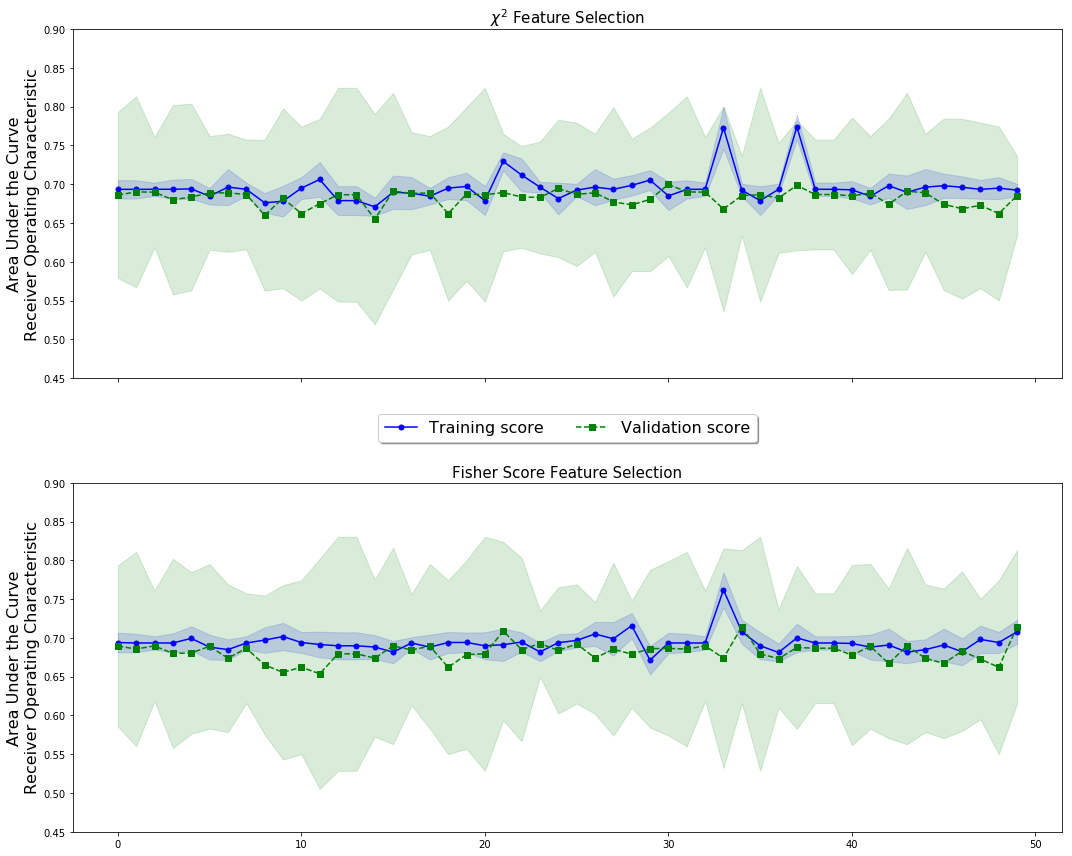

In [90]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 12), sharex=True)

plot_train_test(orig_chi_dtree_results, axes[0])
plot_train_test(orig_fisher_dtree_results, axes[1])

titles = [r'$\chi^2$ Feature Selection', 'Fisher Score Feature Selection']
for num, axis in enumerate(axes.ravel()):
    axis.set_title(titles[num], fontsize=15)
    axis.set_ylim([0.45, 0.9])
    axis.set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

axes[1].legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.22),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

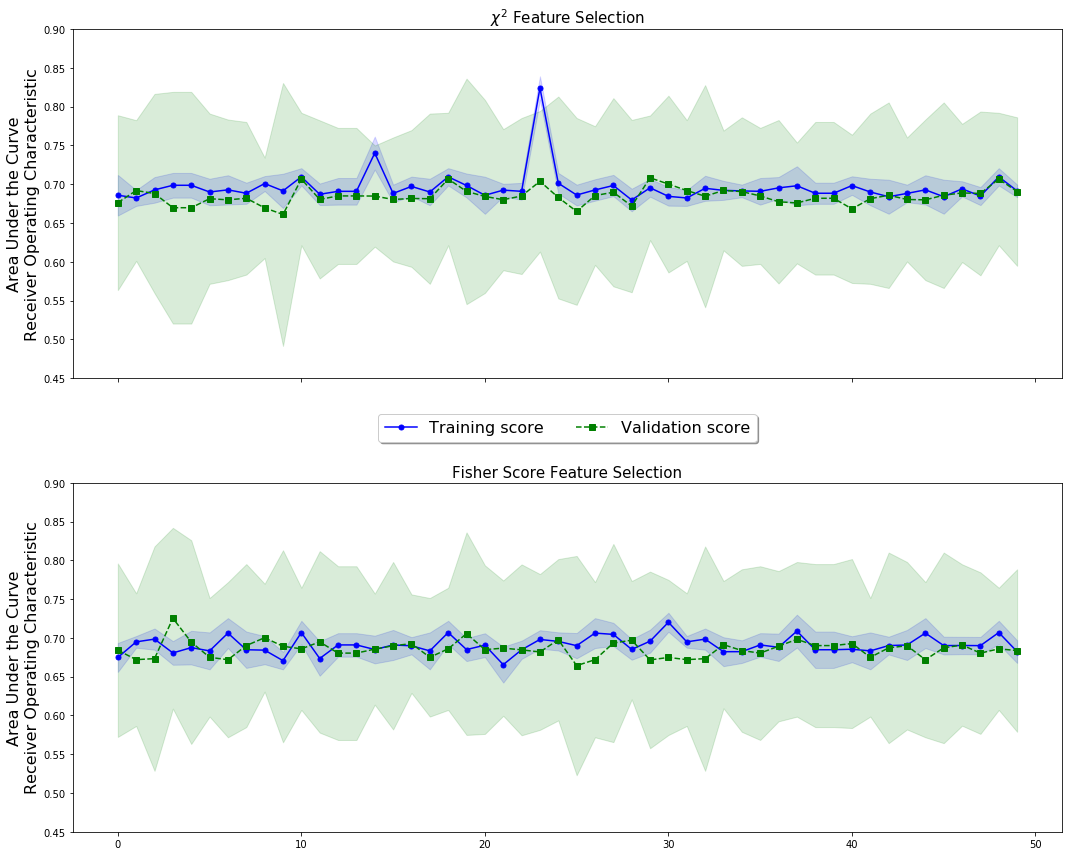

In [93]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 12), sharex=True)

plot_train_test(rs_chi_dtree_results, axes[0])
plot_train_test(rs_fisher_dtree_results, axes[1])

titles = [r'$\chi^2$ Feature Selection', 'Fisher Score Feature Selection']
for num, axis in enumerate(axes.ravel()):
    axis.set_title(titles[num], fontsize=15)
    axis.set_ylim([0.45, 0.9])
    axis.set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

axes[1].legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.22),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

In [98]:
# All configurations were selected as optimal in respective experiments.

# Chi2 Dtree:
# * citerion = gini
# * max_depth = 20
# * max_features = nan/auto
# * min_samples_leaf = 0.20273930108332877

for var_label in list(orig_chi_dtree_results.filter(regex=estimator_name).columns):
    var = np.copy(orig_chi_dtree_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

criterion
------------------------------------------------------------
Counter({'gini': 26, 'entropy': 24})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({20.0: 17, 10.0: 13, 5.0: 13, -1.0: 7})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({nan: 21, 'auto': 15, 'log2': 7, 'sqrt': 7})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({0.2161756165853088: 4, 0.2302850262208748: 3, 0.19017363634819293: 3, 0.2493006392301231: 3, 0.20339438259348955: 3, 0.21271293571698704: 2, 0.213817998605535: 2, 0.1858578475544933: 2, 0.18691721603687195: 2, 0.2160166400563286: 1, 0.2218817914608039: 1, 0.19215356805524325: 1, 0.1982554700797627: 1, 0.23597296292271194: 1, 0.24196282655031945: 1, 0.17656936038200302

## ANOVAFvalueSelection & DTreeEstimator

In [8]:
selector_name = 'ANOVAFvalueSelection' 
estimator_name = 'DTreeEstimator'
model_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

(0.3, 0.9)

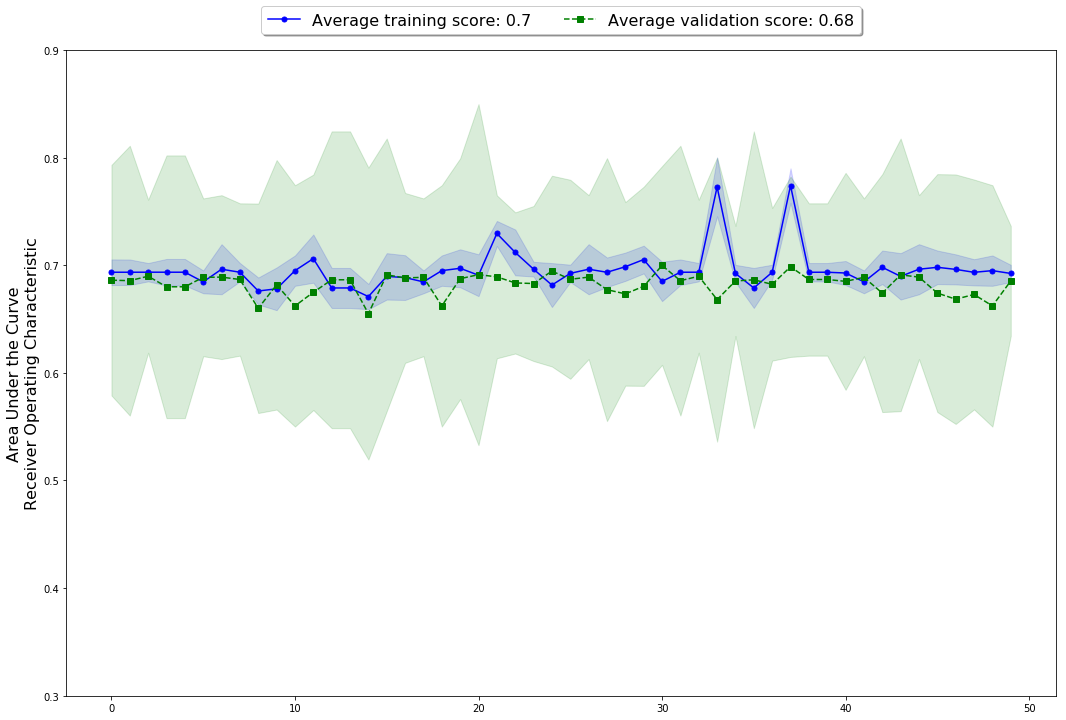

In [9]:
plot_train_test(model_results)
plt.ylim([0.3, 0.9])

In [10]:
for var_label in list(model_results.filter(regex=estimator_name).columns):
    var = np.copy(model_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

criterion
------------------------------------------------------------
Counter({'entropy': 26, 'gini': 24})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({20.0: 17, 5.0: 13, 10.0: 11, -1.0: 9})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({nan: 22, 'auto': 15, 'log2': 7, 'sqrt': 6})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({0.2302850262208748: 3, 0.19017363634819293: 3, 0.2493006392301231: 3, 0.20339438259348955: 3, 0.2161756165853088: 3, 0.24988787820559005: 2, 0.199517641956731: 2, 0.19641065372034944: 2, 0.213817998605535: 2, 0.1858578475544933: 2, 0.18691721603687195: 2, 0.2114769416114468: 1, 0.23597296292271194: 1, 0.24196282655031945: 1, 0.17656936038200302: 1, 0.20405158767783346

## FisherScoreSelection & DTreeEstimator

In [11]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'DTreeEstimator'
model_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

(0.3, 0.9)

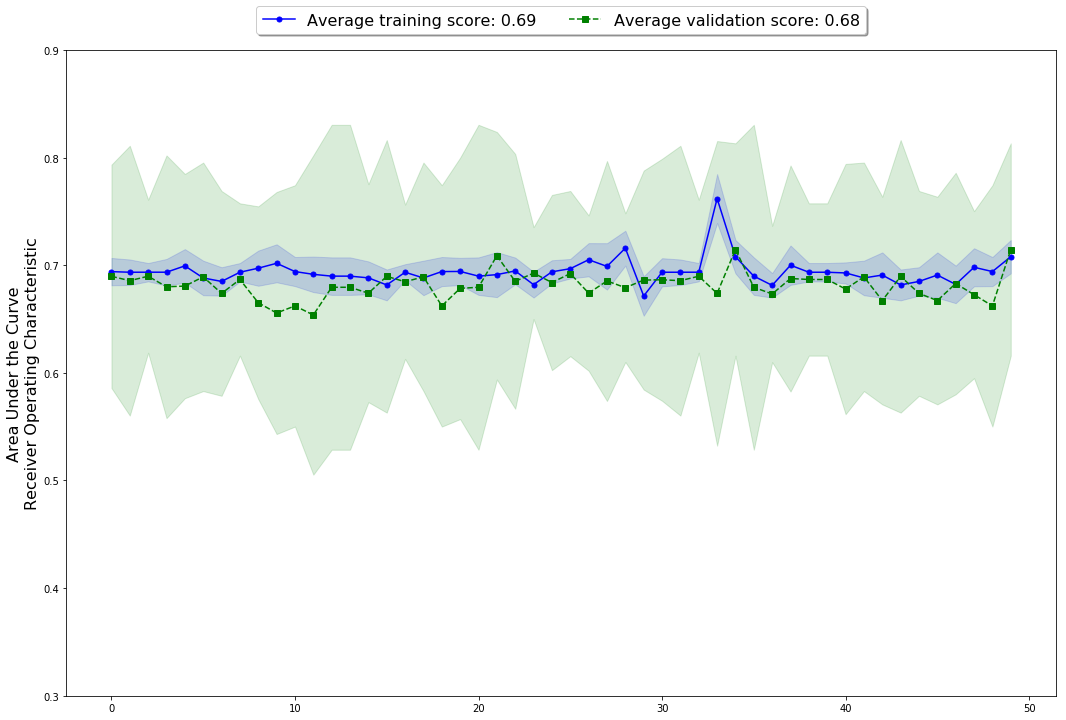

In [12]:
plot_train_test(model_results)
plt.ylim([0.3, 0.9])

In [13]:
for var_label in list(model_results.filter(regex=estimator_name).columns):
    var = np.copy(model_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

criterion
------------------------------------------------------------
Counter({'gini': 27, 'entropy': 23})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({-1.0: 15, 20.0: 13, 5.0: 13, 10.0: 9})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({nan: 26, 'log2': 12, 'auto': 7, 'sqrt': 5})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({0.17632820167045965: 4, 0.22110093525045293: 3, 0.2036755530572458: 3, 0.22910824058470405: 2, 0.2380266117531873: 2, 0.20978320635745049: 2, 0.22124968889655566: 2, 0.1363914005360061: 2, 0.2259913310430141: 2, 0.18692060686006495: 2, 0.1924124368412527: 1, 0.19663499081718308: 1, 0.18306417022082785: 1, 0.22599133104301414: 1, 0.16124837096945607: 1, 0.1982752127901

# Removed Broken Slices

In [14]:
results = pd.read_csv(
    './../../data_source/results/removed_broken_slices/all_features_removed_broken_slices.csv',
    index_col=0
)
results.head()

,exp_id,experiment_id,XGBoost__learning_rate,XGBoost__max_depth,XGBoost__min_data_in_leaf,XGBoost__min_split_loss,XGBoost__n_estimators,XGBoost__reg_alpha,XGBoost__reg_lambda,test_score,...,KNNEstimator__n_neighbors,KNNEstimator__p,DTreeEstimator__criterion,DTreeEstimator__max_depth,DTreeEstimator__max_features,DTreeEstimator__min_samples_leaf,ExtraTreeEstimator__criterion,ExtraTreeEstimator__max_depth,ExtraTreeEstimator__max_features,ExtraTreeEstimator__min_samples_leaf
0,44,DummySelection_XGBoost,3.576890,72.0,5.0,0.000033,134.0,0.113967,7.180005,0.614286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,DummySelection_XGBoost,0.679743,84.0,4.0,0.000001,110.0,0.131464,1.164201,0.574542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,DummySelection_XGBoost,6.691810,230.0,9.0,0.000097,119.0,7.840645,0.454879,0.596429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,DummySelection_XGBoost,0.835361,390.0,10.0,0.000068,173.0,0.635595,7.498201,0.591117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,DummySelection_XGBoost,0.835361,390.0,10.0,0.000068,173.0,0.635595,7.498201,0.591117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ChiSquareSelection & DTreeEstimator

In [15]:
selector_name = 'ChiSquareSelection' 
estimator_name = 'DTreeEstimator'
model_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

(0.3, 0.9)

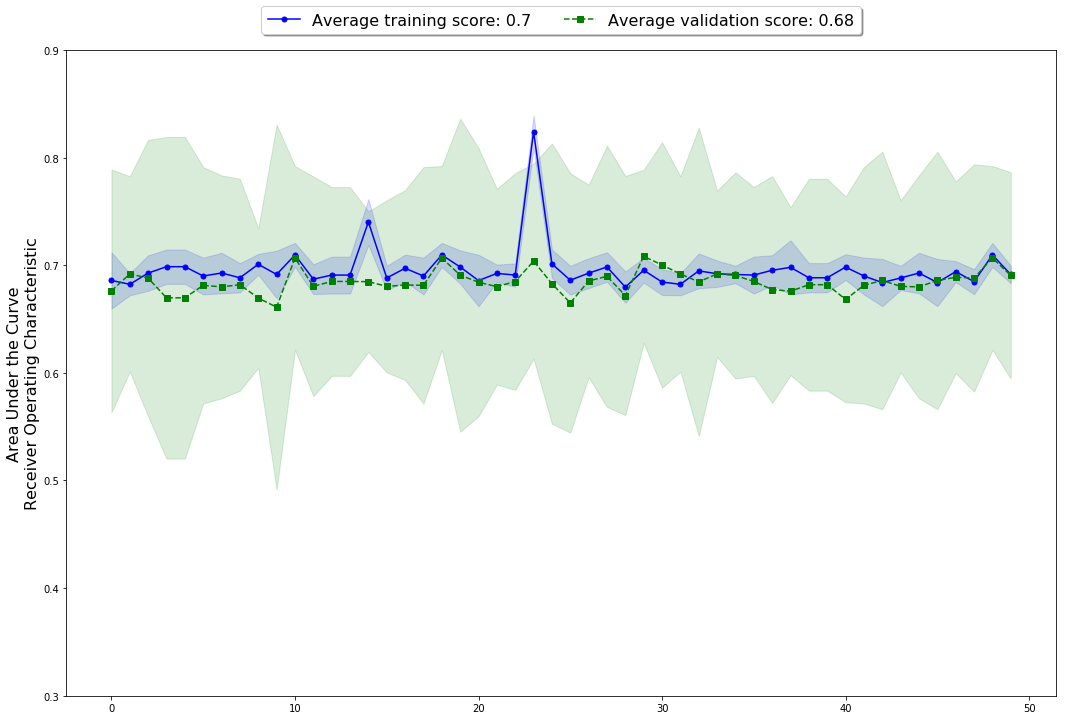

In [16]:
plot_train_test(model_results)
plt.ylim([0.3, 0.9])

In [17]:
for var_label in list(model_results.filter(regex=estimator_name).columns):
    var = np.copy(model_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

criterion
------------------------------------------------------------
Counter({'entropy': 31, 'gini': 19})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({20.0: 17, 10.0: 16, 5.0: 13, -1.0: 4})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({'auto': 18, 'sqrt': 17, 'log2': 10, nan: 5})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({0.24251484312830845: 3, 0.21902780260211807: 3, 0.12361009277959642: 3, 0.24138814838025616: 3, 0.1878751617416668: 2, 0.21288522935746707: 2, 0.1916238207582818: 2, 0.2423685599833621: 2, 0.2278202977010073: 2, 0.2284933432685169: 2, 0.2305888387872948: 1, 0.21265228081102894: 1, 0.2138896453706923: 1, 0.24196282655031945: 1, 0.23177353156440014: 1, 0.08833696707381

## ANOVAFvalueSelection & DTreeEstimator

In [18]:
selector_name = 'ANOVAFvalueSelection' 
estimator_name = 'DTreeEstimator'
model_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

(0.3, 0.9)

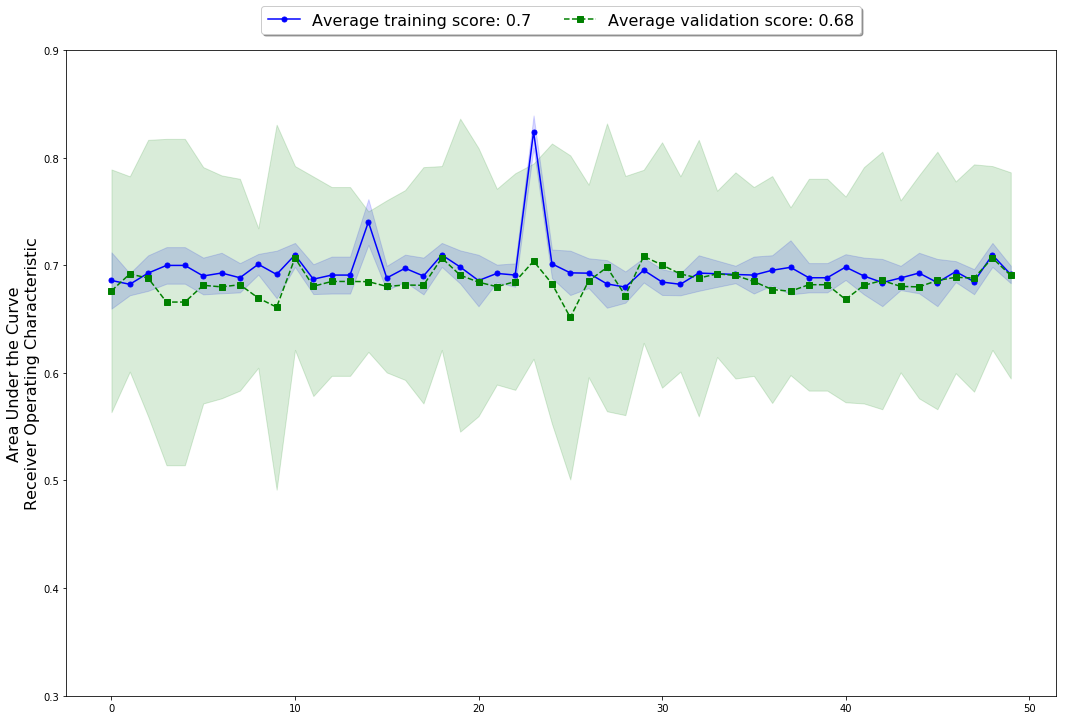

In [19]:
plot_train_test(model_results)
plt.ylim([0.3, 0.9])

In [20]:
for var_label in list(model_results.filter(regex=estimator_name).columns):
    var = np.copy(model_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

criterion
------------------------------------------------------------
Counter({'entropy': 31, 'gini': 19})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({20.0: 17, 5.0: 16, 10.0: 13, -1.0: 4})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({'sqrt': 19, 'auto': 17, 'log2': 9, nan: 5})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({0.24251484312830845: 3, 0.21902780260211807: 3, 0.12361009277959642: 3, 0.24138814838025616: 3, 0.1878751617416668: 2, 0.21265228081102894: 2, 0.20394492708607911: 2, 0.1916238207582818: 2, 0.2423685599833621: 2, 0.2278202977010073: 2, 0.2284933432685169: 2, 0.2305888387872948: 1, 0.2138896453706923: 1, 0.24196282655031945: 1, 0.23177353156440014: 1, 0.088336967073816

## FisherScoreSelection & DTreeEstimator

In [21]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'DTreeEstimator'
model_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

(0.3, 0.9)

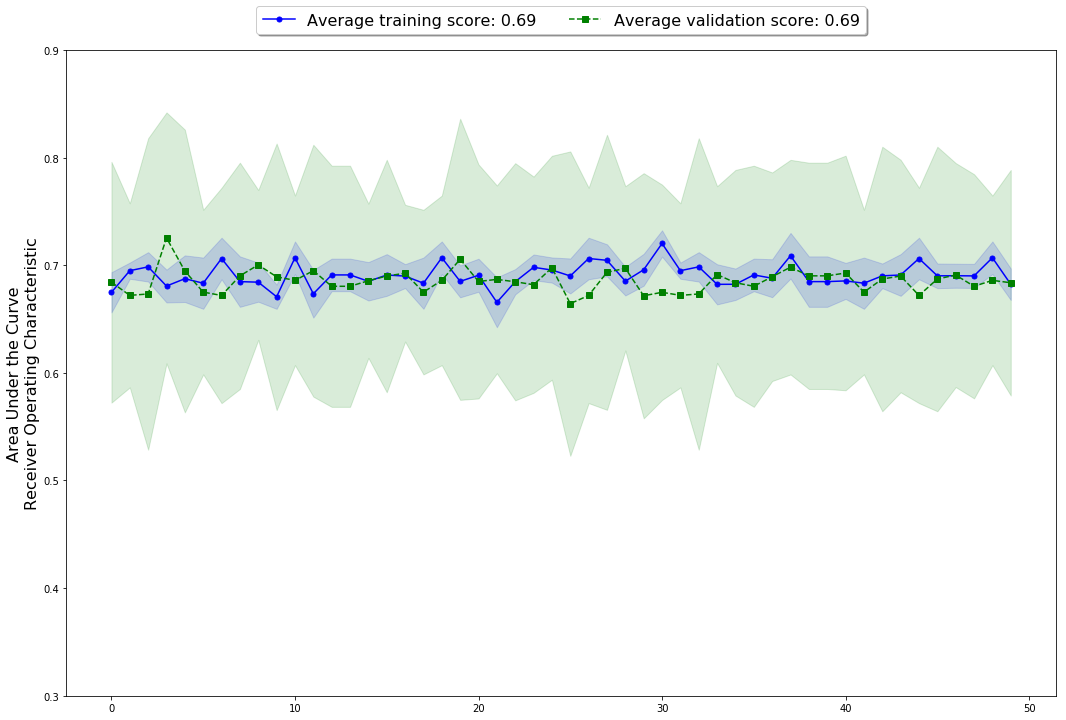

In [22]:
plot_train_test(model_results)
plt.ylim([0.3, 0.9])

In [23]:
for var_label in list(model_results.filter(regex=estimator_name).columns):
    var = np.copy(model_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

criterion
------------------------------------------------------------
Counter({'entropy': 26, 'gini': 24})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({10.0: 19, 5.0: 16, -1.0: 12, 20.0: 3})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({'auto': 17, 'sqrt': 14, nan: 11, 'log2': 8})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({0.21718848657275808: 3, 0.2371592003456511: 3, 0.2135590790303051: 2, 0.22278478182773026: 2, 0.24727762518787735: 2, 0.19808535588612886: 2, 0.2102141645476933: 2, 0.21092697932304807: 2, 0.2487113593695245: 2, 0.247582036097007: 1, 0.22417837786260966: 1, 0.2129140767055677: 1, 0.21021416454769326: 1, 0.2409529938845651: 1, 0.24959228264113506: 1, 0.239330752800949

## ChiSquareSelection & Light GBM 

In [24]:
selector_name = 'ChiSquareSelection' 
estimator_name = 'LightGBM'
model_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

(0.3, 1.1)

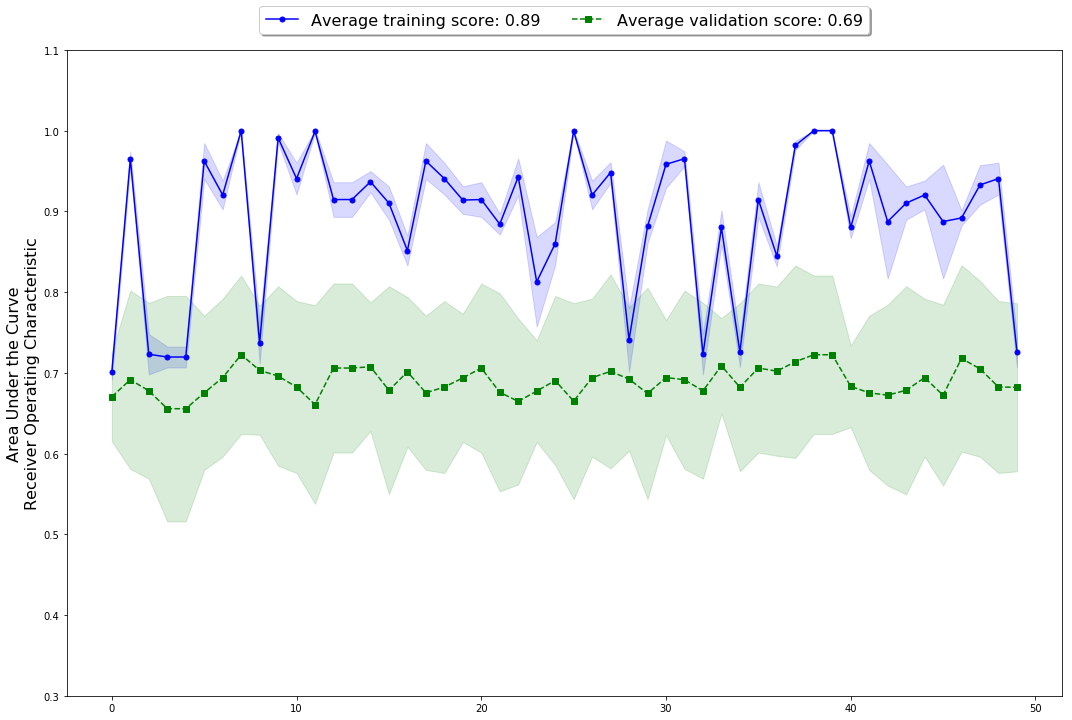

In [25]:
plot_train_test(model_results)
plt.ylim([0.3, 1.1])

In [26]:
for var_label in list(model_results.filter(regex=estimator_name).columns):
    var = np.copy(model_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

learning_rate
------------------------------------------------------------
Counter({0.7760782377388057: 4, 7.8335293262492005: 3, 1.1614116551427132: 3, 2.080993038555784: 3, 4.628860293866089: 3, 0.4979117162494466: 2, 0.7609560852660178: 2, 0.5512253020909565: 2, 1.7631145440109282: 2, 0.9155832589134388: 2, 8.509706482160627: 2, 2.783182081055217: 1, 3.0290103144903626: 1, 1.8377915205650144: 1, 1.8307893692331805: 1, 1.022384557798269: 1, 1.1089246679181337: 1, 0.7771141071698827: 1, 2.109768131226909: 1, 2.212877603455428: 1, 3.6665356271703455: 1, 0.3219737164435453: 1, 1.323047654660735: 1, 2.171604932048637: 1, 4.028125581447622: 1, 0.20098725997968728: 1, 1.7423539150903673: 1, 1.4435595776260195: 1, 0.05567517912315978: 1, 2.3931776601746977: 1, 0.18757462626075372: 1, 0.3705879752043225: 1, 3.2818598823242877: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({279.0: 5, 486.0: 3, 

In [94]:
Counter(var)

Counter({100.0: 7,
         155.0: 2,
         243.0: 1,
         660.0: 1,
         834.0: 3,
         403.0: 3,
         124.0: 1,
         625.0: 1,
         870.0: 3,
         993.0: 1,
         416.0: 3,
         391.0: 1,
         149.0: 2,
         658.0: 1,
         959.0: 1,
         522.0: 1,
         363.0: 1,
         294.0: 1,
         847.0: 1,
         872.0: 1,
         86.0: 1,
         385.0: 1,
         364.0: 1,
         614.0: 1,
         188.0: 1,
         774.0: 1,
         20.0: 1,
         750.0: 1,
         167.0: 1,
         891.0: 2,
         21.0: 1,
         441.0: 1,
         612.0: 1})

## ChiSquareSelection & RF

In [27]:
selector_name = 'ChiSquareSelection' 
estimator_name = 'RFEstimator'
model_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

(0.3, 1.1)

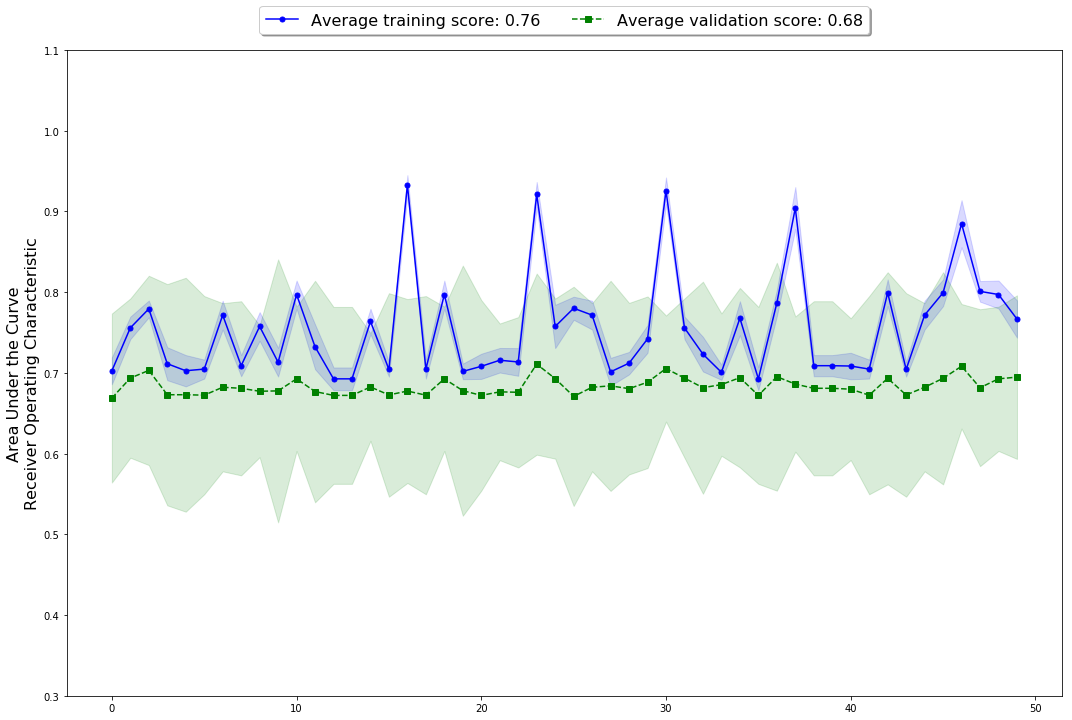

In [28]:
plot_train_test(model_results)
plt.ylim([0.3, 1.1])

In [29]:
for var_label in list(model_results.filter(regex=estimator_name).columns):
    var = np.copy(model_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

bootstrap
------------------------------------------------------------
Counter({False: 32, True: 18})
------------------------------------------------------------


criterion
------------------------------------------------------------
Counter({'gini': 30, 'entropy': 20})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({5.0: 28, 20.0: 12, 10.0: 5, -1.0: 5})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({'auto': 27, nan: 12, 'sqrt': 6, 'log2': 5})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({0.125: 7, 0.22614861300551056: 3, 0.11704170013156405: 3, 0.1337483573698643: 3, 0.14039456823505034: 3, 0.17950608392346645: 2, 0.11905758710385175: 2, 0.10975317331402824: 2, 0.15332704810217376: 1, 0.119